# CM22010 – Convolution&Image Filtering
This lab implements image convolution of greyscale images.

Convolution a basic image filtering operation that is implemented in:
* many computer vision systems (e.g. for edge detection),
* most image editing programs such as Photoshop (e.g. for image sharpening), and
* many deep learning systems, e.g. for convolutional neural networks (CNNs).

Let us start by preparing the notebook, and loading and preparing a test image.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.misc, scipy.ndimage

In [8]:
## Make figures larger
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
# %config InlineBackend.figure_format = 'retina'

C:\Users\baske\AppData\Local\Temp\ipykernel_20128\2838523385.py:2: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image_int = scipy.misc.ascent()


'image_int' has shape (512, 512) and datatype int32


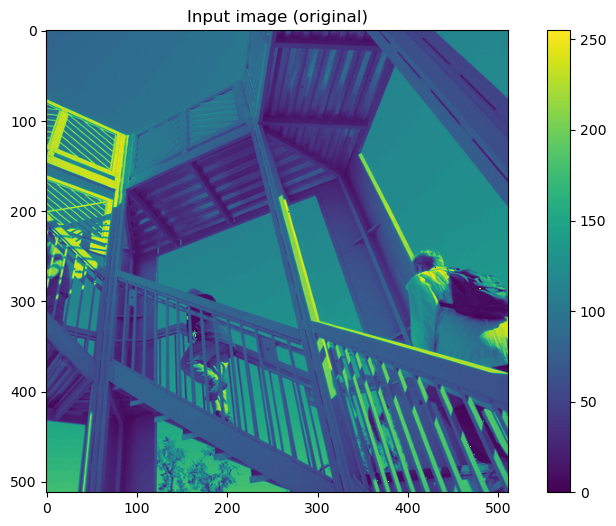

In [9]:
## Load a built-in test image.
image_int = scipy.misc.ascent()
print(f"'image_int' has shape {image_int.shape} and datatype {image_int.dtype}")

## Display the input image.
## Note that Matplotlib by default uses a colour map for single-channel images.
## The colour map is illustrated using the colour bar on the right.
plt.imshow(image_int)
plt.title('Input image (original)')
plt.colorbar();  # The semicolon suppresses the return value of the function.

'image' has shape (512, 512) and datatype float64


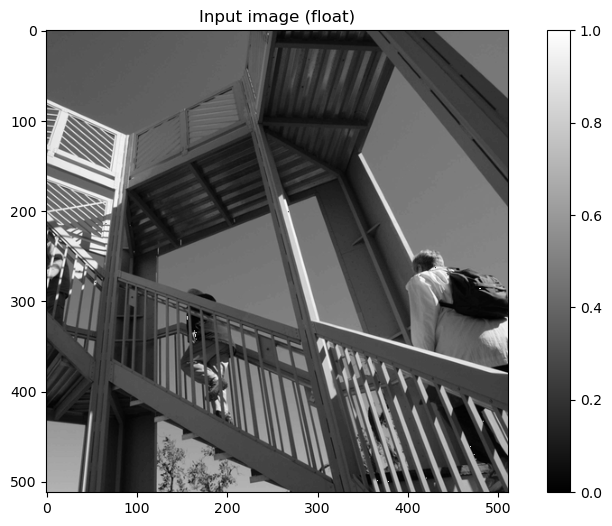

In [10]:
## Convert the image from integer 0..255 to float 0..1 for easier processing.
image = image_int.astype('float') / 255
print(f"'image' has shape {image.shape} and datatype {image.dtype}")

## Here, we override the default colour map using 'gray[scale]',
## and set the range of displayed values to vmin..vmax = 0..1.
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title('Input image (float)')
plt.colorbar();

'image_crop' has shape (100, 100) and datatype float64


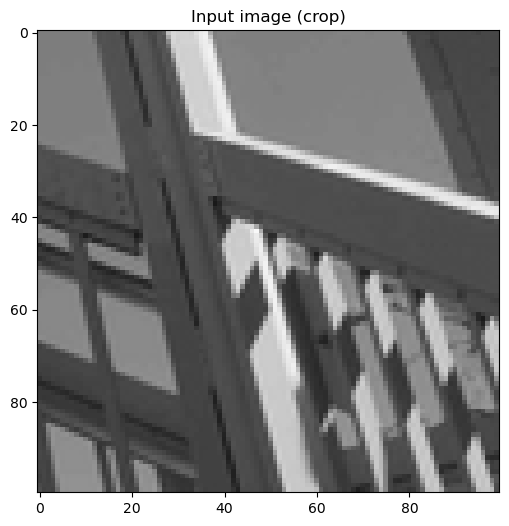

In [11]:
## Lets us crop out a subimage as a test image.
image_crop = image[300:400, 260:360]
print(f"'image_crop' has shape {image_crop.shape} and datatype {image_crop.dtype}")

## Display the image.
plt.imshow(image_crop, cmap='gray', vmin=0, vmax=1)
plt.title('Input image (crop)');

----
## 1. Basic convolution [40 marks]

Implement basic convolution by translating the pseudo-code below to Python.

Fill in the `basic_convolution(image, kernel)` below, which takes as input a grayscale `image` (2D matrix) and a filtering `kernel` (2D matrix), and returns the convolved image result as a greyscale image with the same size and datatype as the input image.

This operation can be described by the following pseudocode:
```
for each image row in input image:
    for each pixel in image row:
        set accumulator to zero
        
        for each kernel row in kernel:
            for each element in kernel row:
                if element position <corresponding to> pixel position then
                    multiply element value <corresponding to> pixel value
                    add result to accumulator
                endif

        set output image pixel to accumulator
```
(`<corresponding to>` input image pixels are found relative to the kernel’s origin)

Source: https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [180]:
def basic_convolution(image, kernel, verbose=False):
  'Computes the convolution of an image with a kernel.'

  k_height, k_width = kernel.shape
  
  pad_height = k_height // 2
  pad_width = k_width // 2

  padded_image = np.pad(image, [(pad_height, ), (pad_width, )], mode="constant")
  i_height, i_width = image.shape
  result = np.zeros((i_height, i_width))

  print(padded_image)
  for i in range(i_height):
    for j in range(i_width):
      acc = 0
      #region = padded_image[i:i + k_height, j:j + k_width]
      for x in range(k_height):
        for y in range(k_width):
          i_value = padded_image[i + x, j + y]
          k_value = kernel[x, y]
          
          acc += i_value * k_value
      
      result[i, j] = acc
      #result[i, j] = np.sum(region * kernel)
  ## TASK: Replace this code with your own implementation of convolution.
  #return np.ones_like(image)
  return result

### Test your result

Demonstrate the functionality of your function by running the following cell.
Does you result looked blurry?

(5, 5)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.49019608 ... 0.27843137 0.         0.        ]
 ...
 [0.         0.         0.30196078 ... 0.29411765 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


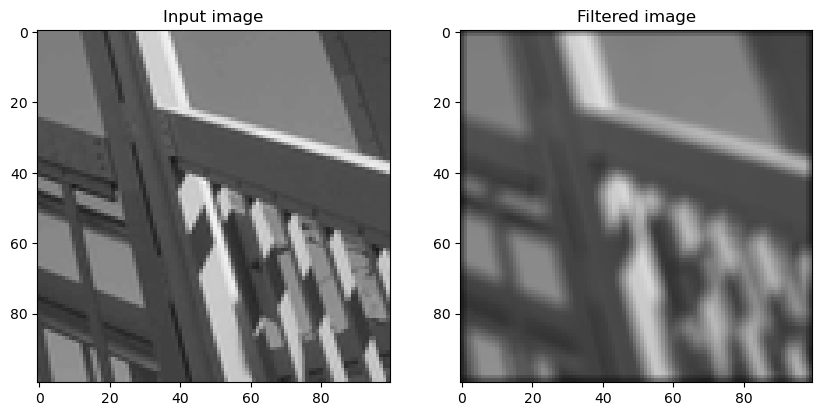

In [192]:
## Prepare a small convolution kernel (good for basic convolution).
kernel = np.ones([5, 5])
kernel = kernel / kernel.sum()  # normalise kernel

#kernel = np.array([[-1, 0, 1]])
print(kernel.shape)
result1 = basic_convolution(image_crop, kernel)

## Display input image on the left.
plt.subplot(1, 2, 1); plt.title('Input image'); plt.imshow(image_crop, cmap='gray', vmin=0, vmax=1)

## Display filtered image on the right.
plt.subplot(1, 2, 2); plt.title('Filtered image'); plt.imshow(result1, cmap='gray', vmin=0, vmax=1);

----
## 2.	Border handling [20 marks]

Improve your implementation from the previous exercise:
1. Centre the filtered image, so that the content of the input and filtered images is not shifted between them; and
2. Fill in the border regions by extending/replicating the edge pixels of the image (‘clamp-to-edge’).

In [201]:
def extended_convolution(image, kernel, verbose=False):
  'Computes the convolution of an image with a kernel, with clamp-to-edge.'
  print(image.shape)
  print(image)
  k_height, k_width = kernel.shape
  
  pad_height = k_height // 2
  pad_width = k_width // 2

  padded_image = np.pad(image, [(pad_height, ), (pad_width, )], mode="edge")
  #print(padded_image)
  i_height, i_width = image.shape
  result = np.zeros((i_height, i_width))
  print(result.shape)

  for i in range(i_height):
    for j in range(i_width):
      acc = 0
      #region = padded_image[i:i + k_height, j:j + k_width]
      for x in range(k_height):
        for y in range(k_width):
          i_value = padded_image[i + x, j + y]
          k_value = kernel[x, y]
          #print("i = ", i, "j = ", j, "x = ", x, "y = ", y)
          acc += i_value * k_value
      
      result[i, j] = acc
      #result[i, j] = np.sum(region * kernel)

  return result
  ## TASK: Replace this code with your own implementation of convolution.
  #return np.ones_like(image)

### Test your result

A perfect result will match SciPy’s function `convolve` (with `mode='nearest'`) exactly, i.e. with a sum of squared differences (SSD) of 0 (zero):

(100, 100)
[[0.49019608 0.49019608 0.49019608 ... 0.27843137 0.27843137 0.27843137]
 [0.49019608 0.49019608 0.49019608 ... 0.27843137 0.2745098  0.2745098 ]
 [0.49019608 0.49019608 0.49019608 ... 0.27843137 0.2745098  0.2745098 ]
 ...
 [0.25882353 0.27058824 0.25882353 ... 0.78431373 0.49019608 0.3372549 ]
 [0.28627451 0.26666667 0.2627451  ... 0.78823529 0.61568627 0.30196078]
 [0.30196078 0.25882353 0.26666667 ... 0.77254902 0.7254902  0.29411765]]
(100, 100)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.00392157
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.00392157
   0.        ]
 ...
 [ 0.01176471  0.          0.01176471 ... -0.26666667 -0.44705882
  -0.15294118]
 [-0.01960784 -0.02352941  0.00784314 ... -0.14117647 -0.48627451
  -0.31372549]
 [-0.04313725 -0.03529412  0.         ... -0.03921569 -0.47843137
  -0.43137255]]
[[ 0.          0.          0.         ...  0.     

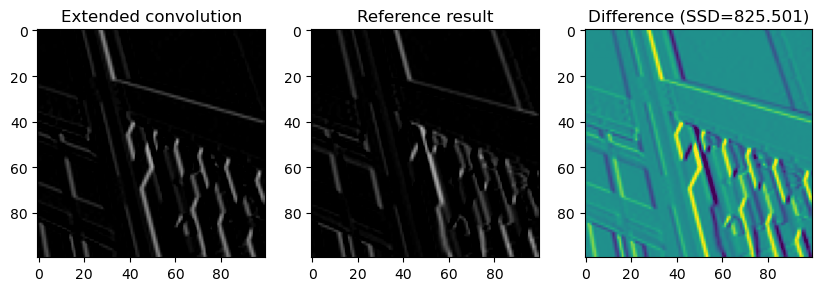

In [203]:
kernel = np.random.rand(5, 5)
kernel = kernel / kernel.sum()  # normalise kernel

kernel = np.array([[-1, 0, 1]])

filtered = extended_convolution(image_crop, kernel)
reference = scipy.ndimage.convolve(image_crop, kernel, mode='nearest')
print(filtered)
print(reference)
print(filtered - reference)
ssd = np.sum(np.power(filtered - reference, 2))

plt.subplot(1, 3, 1); plt.title('Extended convolution');        plt.imshow(filtered,  cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 2); plt.title('Reference result');            plt.imshow(reference, cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 3); plt.title(f'Difference (SSD={ssd:.3f})'); plt.imshow(filtered - reference,   vmin=-1, vmax=1);

----
## 3. Image filtering [10 marks]

a) Design and demonstrate 3×3 convolution kernels for:
* computing horizontal, vertical and (any) diagonal image gradients, and
* sharpening an image using unsharp masking.

In [35]:
## TASK: edit the gradient kernels:
hgrad = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # horizontal gradients
vgrad = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # vertical gradients
dgrad = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])  # diagonal gradients (any direction)

print("horizontal gradient kernel:"); print(hgrad); print()
print("vertical gradient kernel:");   print(vgrad); print()
print("diagonal gradient kernel:");   print(dgrad)

horizontal gradient kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

vertical gradient kernel:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

diagonal gradient kernel:
[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]]


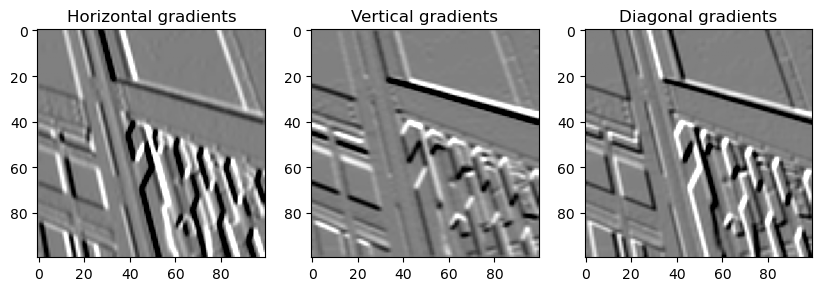

In [36]:
## Perform convolutions with the gradient kernels
hgrad_result = scipy.ndimage.convolve(image_crop, hgrad, mode='nearest')
vgrad_result = scipy.ndimage.convolve(image_crop, vgrad, mode='nearest')
dgrad_result = scipy.ndimage.convolve(image_crop, dgrad, mode='nearest')

## Show results
plt.subplot(1, 3, 1); plt.title('Horizontal gradients'); plt.imshow(hgrad_result, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 2); plt.title('Vertical gradients');   plt.imshow(vgrad_result, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 3); plt.title('Diagonal gradients');   plt.imshow(dgrad_result, cmap='gray', vmin=-1, vmax=1);

Unsharp masking kernel:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


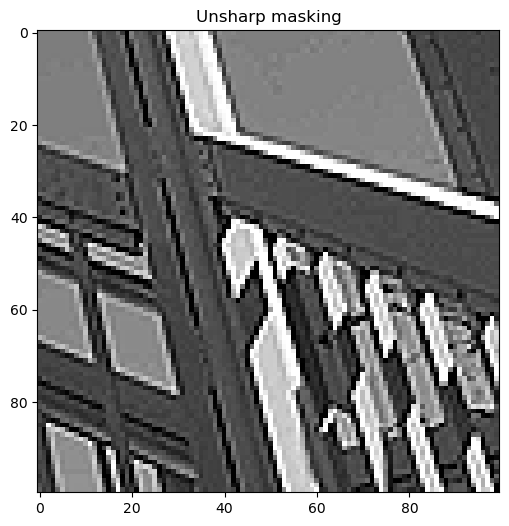

In [37]:
## TASK: unsharp masking kernel
usm = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

print("Unsharp masking kernel:"); print(usm)
usm_result = scipy.ndimage.convolve(image_crop, usm, mode='nearest')
plt.title('Unsharp masking'); plt.imshow(usm_result, cmap='gray', vmin=0, vmax=1);

b) Compute the kernel for a 5×5 Gaussian blur with a standard deviation of 1 pixel.
Make sure that the kernel is normalised.

Gaussian 5x5 kernel:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]

Sum of elements: 1.0


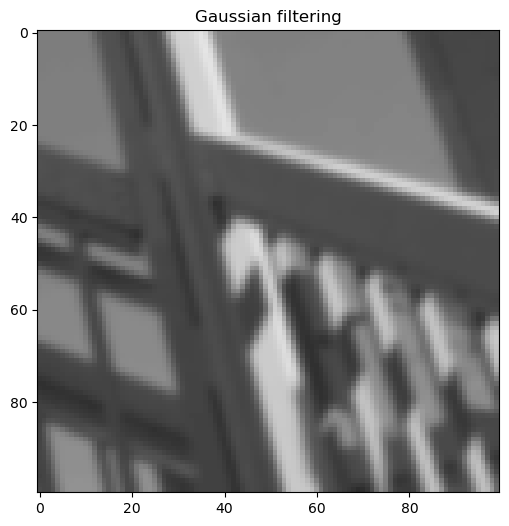

In [38]:
## TASK: 5x5 Gaussian kernel with standard deviation of 1 pixel
gauss = np.zeros([5, 5])
gauss[2, 2] = 1

def gaussian_value(x, y, sigma):
    """Calculate the Gaussian value at coordinates (x, y)."""
    return (1 / (2 * np.pi * sigma ** 2)) * np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))

def gaussian_kernel(size, sigma=1):
    """Generate a Gaussian kernel."""
    kernel = np.zeros((size, size))
    k_center = (size - 1) / 2  # calculating the center index

    for i in range(size):
        for j in range(size):
            # Calculate the coordinates relative to the center
            x = i - k_center
            y = j - k_center
            kernel[i, j] = gaussian_value(x, y, sigma)

    return kernel / np.sum(kernel)

gauss = gaussian_kernel(5, 1)

print("Gaussian 5x5 kernel:"); print(gauss)
print(f"\nSum of elements: {gauss.sum()}")
gauss_result = scipy.ndimage.convolve(image_crop, gauss, mode='nearest')
plt.title('Gaussian filtering'); plt.imshow(gauss_result, cmap='gray', vmin=0, vmax=1);

----
## 4.	Exploiting the convolution theorem [30 marks]

Apply the convolution theorem to speed up the convolution.

You can use NumPy’s functions for 2D Fast Fourier Transform (FFT), `np.fft.fft2` and its inverse `np.fft.ifft2`.

In [63]:
def fft_convolution(image, kernel):
  'Computes the convolution of an image with a kernel using FFT.'
  # Get the size of the image and the kernel
  image_shape = image.shape
  kernel_shape = kernel.shape

  # Compute the size for the FFT (next power of 2 for efficiency)
  output_shape = np.array(image_shape) + np.array(kernel_shape) - 1
  padded_image = np.zeros(output_shape)
  padded_kernel = np.zeros(output_shape)

  # Place the image and kernel in the center of the padded arrays
  padded_image[:image_shape[0], :image_shape[1]] = image
  padded_kernel[:kernel_shape[0], :kernel_shape[1]] = kernel

  # Compute the FFT of the padded image and kernel
  image_fft = np.fft.fft2(padded_image)
  kernel_fft = np.fft.fft2(padded_kernel)

  print("image: ", image_fft[0:5, 0:5])
  print("kernel: ", kernel_fft[0:5, 0:5])

  # Multiply in the frequency domain
  convolved_fft = image_fft * kernel_fft

  print("convolved: ", convolved_fft[0:5, 0:5])

  # Compute the inverse FFT to get back to the spatial domain
  convolved_image = np.fft.ifft2(convolved_fft)

  # Return the real part of the convolved image (as it might contain small imaginary parts due to numerical errors)
  return np.real(convolved_image[:image_shape[0], :image_shape[1]])

  #ft_arrays = np.fft.fft2(image) * np.fft.fft2(kernel)
  #return np.fft.ifft2(ft_arrays)
  ## TASK: Replace this code with your own implementation of convolution.
  #return np.ones_like(image)

### Test your result

A perfect result will match SciPy’s function `convolve` (with `mode='nearest'`) exactly, i.e. with a sum of squared differences (SSD) of 0 (zero):

image:  [[4135.00392157+0.00000000e+00j -293.80701815+2.08394164e+02j
    30.20989507-3.31647552e+01j -161.83518645-1.72014361e+02j
    46.48490452-6.73988096e+01j]
 [  65.38352675-7.14759238e+01j -108.28967701+2.21198374e+01j
    12.02791967+7.46236839e+00j    4.51689525-1.61083859e+02j
   -78.05215029+1.74761703e+01j]
 [-132.59963172-2.70829611e+02j -113.31280831-5.36817411e+01j
    56.8088432 +7.69640121e+00j    4.84102639-8.20587644e+01j
   -57.9426245 +3.60701278e+00j]
 [ -62.63351889+4.42041294e+01j   57.54991143+9.11732242e+01j
    59.69277888+1.51684920e+01j  -33.33297168+5.52386070e+01j
    68.71727574-1.18791680e+01j]
 [ -66.91756014-1.94676054e-01j   -9.29999505-2.61120289e+00j
   -21.92311087+7.40916504e+01j  -26.44069957-7.30433820e+01j
   -28.49946302+4.74130543e+01j]]
kernel:  [[1.        +0.j         0.99633598-0.06967562j 0.98539228-0.13852825j
  0.96731326-0.20574651j 0.94233719-0.270542j  ]
 [0.99532538-0.08606072j 0.98588274-0.15512015j 0.96926071-0.2227584j
  0.945

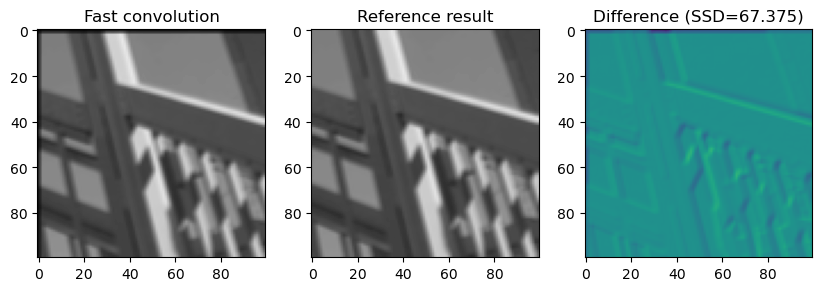

In [64]:
kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel = kernel / kernel.sum()  # normalise kernel

filtered = fft_convolution(image_crop, kernel)
reference = scipy.ndimage.convolve(image_crop, kernel, mode='nearest')
ssd = np.sum(np.power(filtered - reference, 2))

plt.subplot(1, 3, 1); plt.title('Fast convolution');            plt.imshow(filtered,  cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 2); plt.title('Reference result');            plt.imshow(reference, cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 3); plt.title(f'Difference (SSD={ssd:.3f})'); plt.imshow(filtered - reference,   vmin=-1, vmax=1);

### Run-time comparison *(optional)*

You can use the following code to compare the run times of your FFT-based convolution function with “extended_convolution” above for different kernel sizes.
Please this code comment out when submitting your code, as it slows down the marking process.

In [55]:
#import time

#print('Kernel size  | Naive (crop) | FFT (crop) | FFT (full image)')
#for kernel_size in range(1, 10):
#    print(f"{kernel_size}-by-{kernel_size}".center(13), end='')
#    kernel = np.ones([kernel_size, kernel_size]) / kernel_size ** 2
#
#    tic = time.time()
#    result = extended_convolution(image_crop, kernel)
#    elapsed = time.time() - tic
#    print(f"| {elapsed:12.3f} ", end='')
#
#    tic = time.time()
#    result = fft_convolution(image_crop, kernel)
#    elapsed = time.time() - tic
#    print(f"| {elapsed:10.3f} ", end='')
#
#    tic = time.time()
#    result = fft_convolution(image, kernel)
#    elapsed = time.time() - tic
#    print(f"| {elapsed:10.3f}")

Kernel size  | Naive (crop) | FFT (crop) | FFT (full image)
    1-by-1   |        0.001 |      0.002 |      0.051
    2-by-2   |        0.000 |      0.003 |      0.072
    3-by-3   |        0.000 |      0.000 |      0.176
    4-by-4   |        0.007 |      0.008 |      0.202
    5-by-5   |        0.000 |      0.008 |      0.097
    6-by-6   |        0.000 |      0.008 |      0.124
    7-by-7   |        0.000 |      0.010 |      0.085
    8-by-8   |        0.000 |      0.006 |      0.195
    9-by-9   |        0.005 |      0.000 |      0.059
